# **Subject: Machine Learning for Energy Management**

**Predictive Analysis of Energy Consumption Patterns using Machine Learning**

**Name: Sadia AHSAN**

**Student ID: 20234971**

Objective: To develop a machine learning-based model that can accurately predict household energy consumption across various time intervals, including hourly, daily, and weekly periods. By leveraging historical energy consumption data and employing a state-of-the-art machine learning model, the aim is to build a predictive model that not only captures the underlying patterns in energy consumption but also provides insights for effective energy management strategies

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# **Methodology**

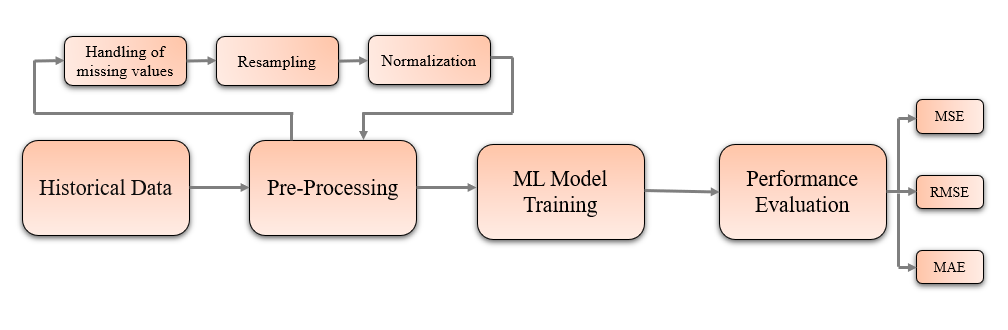


The design methodology involves the following steps:
1. Historical Data Collection:

 Historical dataset is collected from individual household smart meters.

2. Data Pre-Processing:
- Missing Values Handling: Missing values in the dataset are addressed.
- Resampling: The data is resampled to different time intervals (hourly, daily, and weekly) to analyze energy consumption patterns effectively.
- Normalization: Feature normalization is applied to ensure uniformity in the scale of features.

3. ML Model Training:

 A machine learning model is trained using the preprocessed data to predict household energy consumption.

4. Performance Evaluation:

 The performance of the trained model is evaluated using various metrics i.e. RMSE, MSE, MAE to assess its accuracy and effectiveness in predicting energy consumption patterns.



# Dataset
------------------
The dataset used in this project is the "Individual household electric power consumption" dataset, which can be accessed through the following link: [Data link](http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)

Attribute Information:
1. Global Active Power (GAP): The overall active power averaged over a minute consumed by the household (kilowatts)

2. Global Reactive Power (GRP): The overall reactive power consumption averaged over a minute consumed by the household (kilowatts)

3. Voltage: The voltage level averaged over a minute (volts)

4. Global Intensity: The household's minute-averaged current intensity (Amperes)

5. Sub-Metering 1: The active energy consumption for specific appliances or areas (watt-hours)

6. Sub-Metering 2: The active energy consumption for designated areas (watt-hours)

7. Sub-Metering 3: The active energy consumption for climate control systems (watt-hours)


**Loading Data**

In [33]:
# Load the original dataset
df= pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';')
# Display the first few rows of the dataset
df.head()

<ipython-input-33-e6408083e226>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [34]:
#Merge Date and Time columns into a single 'date time' column
df = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', sep=';',
                 parse_dates={'date time' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='date time')

# Display the first few rows of the dataset with the merged 'date time' column
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [35]:
# Save the DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/merged_household_power_consumption.csv')

In [36]:
#Display the shape of the dataset
print('Data Shape:', df.shape)

Data Shape: (2075259, 7)


In [37]:
#Display the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [38]:
# Check for Missing values
df.isnull().sum(axis=0)

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

*In every feature, there are 25979 null/Missing values.*

## **Data Pre-Processing**
- **Step 1:** Handling of Missing values

- **Step 2:** Resampling

- **Step 3:** Normalization


##**Step 1:	Handling of Missing values**

In [39]:
# Check for missing values in the Dataset
missing_values_sum = df.isnull().sum()
print(missing_values_sum)

if missing_values_sum.any():
    print("\nThere are missing values in the Dataset.")
else:
    print("\nNo missing values in the Dataset.")

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

There are missing values in the Dataset.


In [40]:
#Finding all columns that have missing values
droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)
# Print the list of columns with missing values
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

**Fill the missing values:** To effectively fill missing values, mean imputation is employed for columns with missing entries. Mean imputation is chosen for its effectiveness in handling missing data by replacing the missing values in each particular feature with the mean of that specific feature.

In [41]:
#mean imputation
for j in range(0,7):
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [42]:
# Check for missing values again after mean imputation
missing_values_sum = df.isnull().sum()
print(missing_values_sum)

if missing_values_sum.any():
    print("\nThere are still missing values in the Dataset.")
else:
    print("\nNo missing values in the Dataset.")


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

No missing values in the Dataset.


In [43]:
# Save the processed dataset
df.to_csv('/content/drive/MyDrive/processed_household_power_consumption.csv')

# Display the first few rows of the processed dataset
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


##**Step 2:	Data Resampling**
The original dataset, characterized by measurements at a per-minute frequency, is resampled to higher intervals such as hours, days, and weeks. This transformation aims to evaluate the performance of the ML model at different time scales and assess how well it captures the underlying energy consumption patterns in the data.


In [44]:
# Resampling the data to hourly intervals
df_resample_hour = df.resample('h').mean()
# Print the shape of resampled dataset
print("Shape of Hourly Data:", df_resample_hour.shape)
#df_resample_hour.head()

Shape of Hourly Data: (34589, 7)


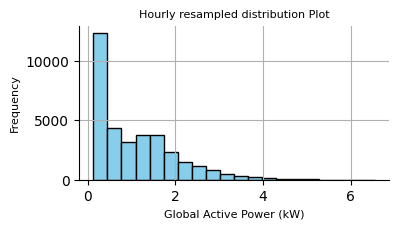

In [45]:
# @title Hourly Energy Consumption Distribution
# Visualizing the distribution of the Global_active_power (GAP) variable
# after resampling the data to hourly intervals. It provides insights
# into the hourly energy consumption patterns.

from matplotlib import pyplot as plt

plt.figure(figsize=(4, 2))  # Adjust figure size
plt.hist(df_resample_hour['Global_active_power'], bins=20, color='skyblue', edgecolor='black')
plt.title('Hourly resampled distribution Plot',fontsize=8)
plt.xlabel('Global Active Power (kW)',fontsize=8)
plt.ylabel('Frequency',fontsize=8)
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [46]:
# Resampling the data to daily intervals
df_resample_day= df.resample('D').mean()
# Print the shape of resampled dataset
print("Shape of Daily Data:", df_resample_day.shape)
#df_resample_day.head()

Shape of Daily Data: (1442, 7)


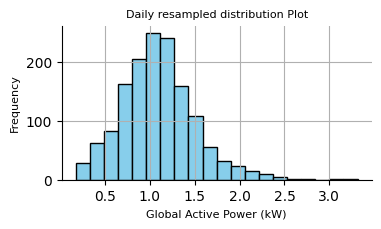

In [47]:
# @title Daily Energy Consumption Distribution
# Visualizing the distribution of the Global_active_power (GAP) variable
# after resampling the data to daily intervals provides insights
# into the daily energy consumption patterns.

plt.figure(figsize=(4, 2))  # Adjust figure size
plt.hist(df_resample_day['Global_active_power'], bins=20, color='skyblue', edgecolor='black')
plt.title('Daily resampled distribution Plot', fontsize=8)
plt.xlabel('Global Active Power (kW)', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [48]:
# Resampling the data to weekly intervals
df_resample_week = df.resample('W').mean()
# Print the shape of resampled dataset
print("Shape of Weekly Data:", df_resample_week.shape)
#df_resample_week.head()

Shape of Weekly Data: (207, 7)


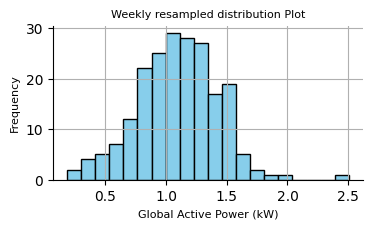

In [49]:
# @title Weekly Energy Consumption Distribution
# Visualizing the distribution of the Global_active_power (GAP) variable
# after resampling the data to weekly intervals provides insights
# into the weekly energy consumption patterns.

plt.figure(figsize=(4, 2))  # Adjust figure size
plt.hist(df_resample_week['Global_active_power'], bins=20, color='skyblue', edgecolor='black')
plt.title('Weekly resampled distribution Plot', fontsize=8)
plt.xlabel('Global Active Power (kW)', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


##**Step 3:	Normalization**
To ensure uniformity in the scale of features, normalization is applied using Min-Max scaling. This process transforms the values of each feature to a standardized range, typically between 0 and 1

In [50]:
# Normalize features
df_resample=df_resample_hour
#df_resample=df_resample_day
#df_resample=df_resample_week

# apply scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_resample)

print("Shape:", scaled.shape)


Shape: (34589, 7)


###**XGBoost - Machine Learning  Model**
XGBoost (Extreme Gradient Boosting) is a machine learning algorithm that utilizes an optimized and efficient implementation of gradient boosting



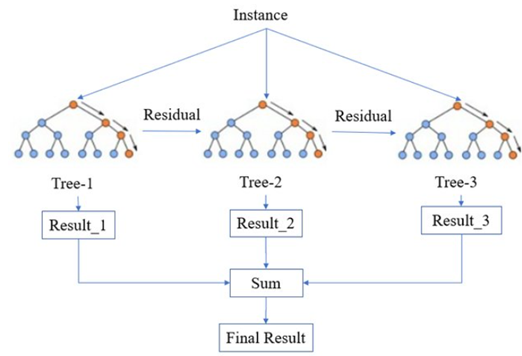

**Training Phase:**

During training, XGBoost sequentially builds multiple decision trees. Each tree aims to correct errors made by its predecessors. XGBoost optimizes its training by focusing on minimizing residuals (differences between actual and predicted values). These residuals are intelligently fed into the next tree, enabling each subsequent tree to target and reduce the remaining errors not captured by the ensemble.

**Prediction Phase:**

After constructing an ensemble of decision trees during training, XGBoost makes predictions efficiently on new data. Each instance is passed through every tree and the individual predictions from each tree are combined to yield the final prediction. The prediction for a specific instance is generated by summing the predictions from each tree, with each tree's contribution weighted by a factor that reflects its performance on the training data.

###**Importing Libraries**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

### **Feature and Target Selection**

For training the XGBoost ML model, the selection of features and target variables is crucial to ensure accurate prediction of energy consumption patterns.

**Input Features:**
The following features are selected to serve as inputs for the XGBoost model:

- Global Reactive Power (GRP)
- Voltage
- Global Intensity
- Sub-Metering 1
- Sub-Metering 2
- Sub-Metering 3

These features have been chosen to capture the complex dynamics of energy consumption within the household accurately. By incorporating these features, model could learn patterns essential for predicting total power consumption effectively.

**Target:**
The target variable selected for prediction is the Global Active Power (GAP) which represents the overall energy consumed by the household. By focusing on Global Active Power (GAP) as a target variable, the model aims to provide valuable insights into total energy demand, facilitating informed decision-making regarding energy management strategies and resource allocation.

In [ ]:
# Splitting the datset into input features and target variables
X = scaled[:, 1:]  # Input features
y = scaled[:, 0]   # Target variable (Global_active_power)

# Print input features and target variables
print("Input Features:")
for column in df.columns[1:]:
    print(f"{column}")

print("\nTarget Variable:")
print(f"{df.columns[0]}")

# Print the shape of X (Input features) and y (Target variable)
print("\nShape of X (Input Features):", X.shape)
print("Shape of y (Target Variable):", y.shape)

Input Features:
Global_reactive_power
Voltage
Global_intensity
Sub_metering_1
Sub_metering_2
Sub_metering_3

Target Variable:
Global_active_power

Shape of X (Input Features): (34589, 6)
Shape of y (Target Variable): (34589,)


###**Data splitting**
The dataset is divided into two sets: the training set and the testing set, utilizing a 70-30 split ratio.

**Training Set:**
- X_train: Contains 70% of the input features and is utilized for model training.
- y_train: Corresponds to the target variable for the training set.

**Testing Set:**
- X_test: Consists of the remaining 30% of the input features and is employed to evaluate the trained model.
- y_test: Corresponds to the target variable for the testing set.

A specific random_state value is set (in this case, random_state=42) to ensures reproducibility by setting the random seed for data splitting.

In [ ]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (24212, 6)
Shape of X_test: (10377, 6)
Shape of y_train: (24212,)
Shape of y_test: (10377,)



###**XGBoost Model Training**
**Hyperparameters:** The XGBoost model's hyperparameters are optimized to ensure optimal performance while preventing overfitting.
- n_estimators: The number of trees in the XGBoost model is set to 150 for ensemble learning, balancing computational efficiency and model complexity.
- max_depth: A maximum depth of the tree is set to 3, capturing more complex patterns in the training data while preventing overfitting.
- Learning rate: The learning rate is set to 0.1 to optimize the training process.
- subsample: The Subsample is set to 1.0 to utilize the entire training set and to consider all samples during the construction of each tree.
- The fraction of features used for building each tree is set to 1.0 to consider all features for splitting at each node.

In [ ]:
ML_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,
    max_depth=3,
    learning_rate=0.1,
    subsample=1.0,
    colsample_bytree=1.0
)
train_X = X_train
train_y = y_train

# Train the model with the specified hyperparameters
ML_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Prediction on Test Set**

Once the model is trained, predictions are made on the test set to evaluate its performance on unseen data.

In [ ]:
# Make predictions on the test set
y_pred = ML_model.predict(X_test)

###**Error Metrics Calculation**

Several error metrics are calculated to assess the model's performance:

**Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.

 \\(MSE= \frac{1}{n}\sum_{i=1}^{n}\left(y_i-\widehat{y_i}\right)^2\\)

In [ ]:
# Calculate Mean Squared Error (MSE)
n = len(y_test)
mse = sum((y_test - y_pred) ** 2) / n
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 2.704415817509322e-05


**Root Mean Squared Error (RMSE):** Represents the square root of the Mean Squared Error, providing a measure of the average magnitude of prediction errors

\\(RMSE =\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_i-\widehat{y_i}\right)^2}\\)

In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 0.005200399809158256


**Mean Absolute Error (MAE):** Measures the average absolute difference between actual and predicted values.   
   \\(MAE=\frac{1}{n}\sum_{i=1}^{n}\left|y_i-\widehat{y_i}\right|\\)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 0.0023623423442407534


###**Comparison of Actual vs Predicted Global Active Power (GAP) -- (Hourly)**
To visualize the model's predictive accuracy on an hourly time scale, the first 200 samples are selected for comparison of actual vs predicted GAP values.

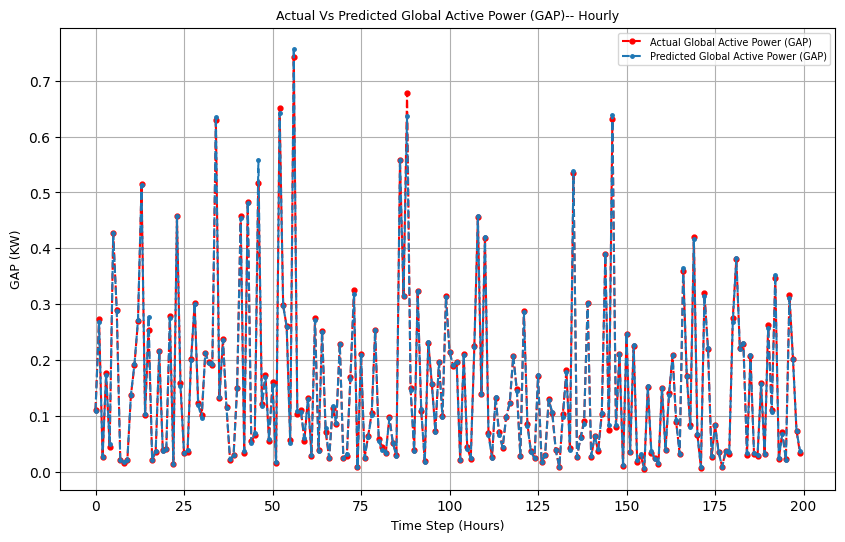

In [ ]:
time_steps = range(200)
plt.figure(figsize=(10, 6))  # Set the width and height to your desired size

plt.plot(time_steps, y_test[:200], marker='.', color='r',label="Actual Global Active Power (GAP)", linestyle='--', markersize=7)
plt.plot(time_steps, y_pred[:200], marker='.',  label="Predicted Global Active Power (GAP)", linestyle='--', markersize=5)

plt.title('Actual Vs Predicted Global Active Power (GAP)-- Hourly', size=9)
plt.xlabel('Time Step (Hours)', size=9)
plt.ylabel('GAP (KW)', size=9)

# Move the legend to the right side
plt.legend(fontsize=7)

plt.grid(True)
plt.show()


Mean Squared Error (MSE): 6.735358128737962e-05
Root Mean Squared Error (RMSE): 0.0082069227660177
Mean Absolute Error (MAE): 0.0037185357000801183


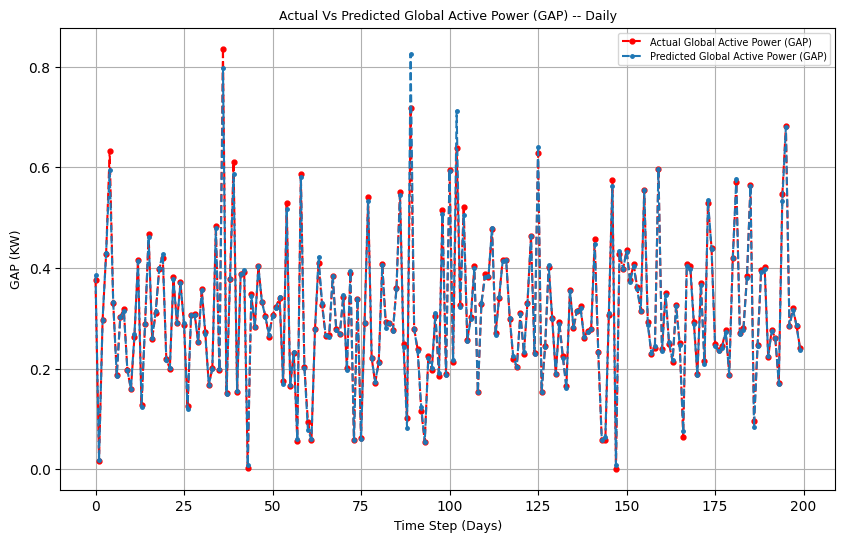

In [ ]:
# @title Comparison of Actual vs Predicted Global Active Power (GAP) -- (Daily)
# Normalize features
#df_resample=df_resample_hour
df_resample=df_resample_day
#df_resample=df_resample_week
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_resample)

#print("Shape:", scaled.shape)
# Splitting the datset into input features and target variables
X = scaled[:, 1:]  # Input features
y = scaled[:, 0]   # Target variable (Global_active_power)


# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


train_X = X_train
train_y = y_train

# Train the model with the specified hyperparameters
ML_model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = ML_model.predict(X_test)
# Calculate Mean Squared Error (MSE)
n = len(y_test)
mse = sum((y_test - y_pred) ** 2) / n
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error (MAE): {mae}')


# Modify the range as needed
#time_steps = range(len(y_test))  # Adjust the range based on the length of your test set
time_steps = range(200)
plt.figure(figsize=(10, 6))  # Set the width and height to your desired size

plt.plot(time_steps, y_test[:200], marker='.', color='r',label="Actual Global Active Power (GAP)", linestyle='--', markersize=7)
plt.plot(time_steps, y_pred[:200], marker='.',  label="Predicted Global Active Power (GAP)", linestyle='--', markersize=5)

plt.title('Actual Vs Predicted Global Active Power (GAP) -- Daily', size=9)
plt.xlabel('Time Step (Days)', size=9)
plt.ylabel('GAP (KW)', size=9)

# Move the legend to the right side
plt.legend(fontsize=7)

plt.grid(True)
plt.show()

Mean Squared Error (MSE): 0.00010803778132083475
Root Mean Squared Error (RMSE): 0.01039412244111232
Mean Absolute Error (MAE): 0.005670123884846808


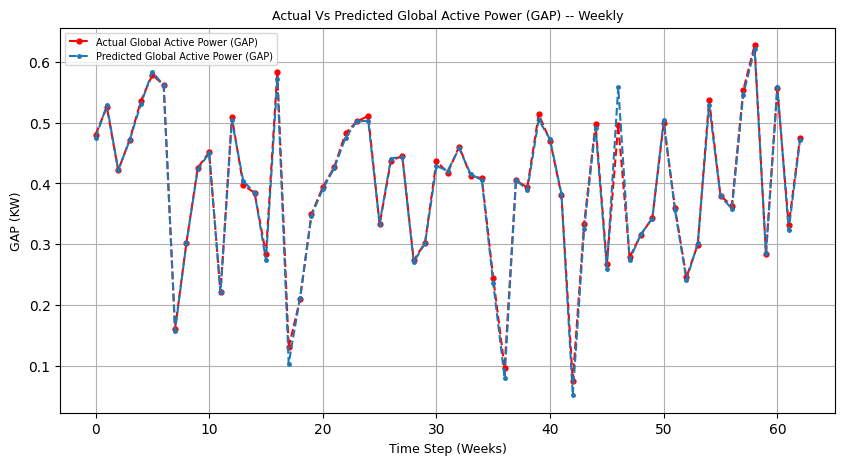

In [ ]:
# @title Comparison of Actual vs Predicted Global Active Power (GAP) -- (Weekly)
# Normalize features

df_resample=df_resample_week
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_resample)

#print("Shape:", scaled.shape)
# Splitting the datset into input features and target variables
X = scaled[:, 1:]  # Input features
y = scaled[:, 0]   # Target variable (Global_active_power)



# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_X = X_train
train_y = y_train

# Train the model with the specified hyperparameters
ML_model.fit(train_X, train_y)

# Make predictions on the test set
y_pred = ML_model.predict(X_test)
# Calculate Mean Squared Error (MSE)
n = len(y_test)
mse = sum((y_test - y_pred) ** 2) / n
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error (MAE): {mae}')


# Modify the range as needed
time_steps = range(len(y_test))  # Adjust the range based on the length of your test set
#time_steps = range(200)
plt.figure(figsize=(10, 5))  # Set the width and height to your desired size

plt.plot(time_steps, y_test, marker='.', color='r',label="Actual Global Active Power (GAP)", linestyle='--', markersize=7)
plt.plot(time_steps, y_pred, marker='.',  label="Predicted Global Active Power (GAP)", linestyle='--', markersize=5)

plt.title('Actual Vs Predicted Global Active Power (GAP) -- Weekly', size=9)
plt.xlabel('Time Step (Weeks)', size=9)
plt.ylabel('GAP (KW)', size=9)

# Move the legend to the right side
plt.legend(fontsize=7)

plt.grid(True)
plt.show()

####**Conclusion**
This study investigated the application of the state-of-the-art XGBoost ML algorithm for predicting energy consumption patterns across various time intervals, including hourly, daily, and weekly periods, with the goal of enhancing energy management efficiency.

The findings highlight the effectiveness of the XGBoost model in accurately predicting overall energy consumption, as demonstrated by consistently low error metrics across hourly, daily, and weekly intervals. Notably, the model exhibits exceptional precision at the hourly scale, enabling real-time monitoring and precise control of energy usage. Though slight increases in error metrics are observed at daily and weekly intervals due to data aggregation over longer periods, the model's performance remains commendable, reaffirming its suitability for broader energy management decisions.

These precise predictions have significant implications for energy demand planning, offering opportunities for cost savings, optimized resource allocation, and enhanced sustainability in energy management strategies. As such, the integration of advanced machine learning techniques, such as XGBoost, holds promise for revolutionizing energy management practices and fostering a more sustainable energy future.

